# Observations

#### - Capomulin and Ramicane were administered to most number of mice. Given their similar final tumor volume range, Ramicane will be the most direct competitor to Pymaceutical's Capomulin
#### - Ratio of female to male rats was almost similar in the study, which can be used to perform gender specific analysis to see of any of the drug performs better in any of the gender
#### - Only Infubinol seems to exhibit an outlier observation, out of its lower bound range of 42.38 mm3
#### - Capomulin seems to be a very effective drug, with a decrease in tumor volume by almost 48.1% in Mouse ID s185 at Day 45 of administration
#### - There appears to be a high, positive correlation (0.84) between the weight of mice treated with Capomulin and the average tumor volume

In [251]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [252]:
# Importing resource csvs
path_mousedata = "Resources/Mouse_metadata.csv"
path_studyresults = "Resources/Study_results.csv"

mouse_data = pd.read_csv(path_mousedata)
study_results = pd.read_csv(path_studyresults)
mouse_data.head()
# study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [253]:
# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_data,study_results,how='outer',on='Mouse ID')
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [254]:
mouse_study_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [255]:
mouse_study_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [256]:
# Storing unique drug names
drug_names = mouse_study_data['Drug Regimen'].unique()
drug_names

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

# Summary Statistics

In [257]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_mouse_study_data = mouse_study_data.groupby(['Drug Regimen'])

tumor_vol_means = round(grouped_mouse_study_data['Tumor Volume (mm3)'].mean(),2)
# tumor_vol_means
tumor_vol_medians = round(grouped_mouse_study_data['Tumor Volume (mm3)'].median(),2)
# tumor_vol_medians
tumor_vol_modes = round(grouped_mouse_study_data['Tumor Volume (mm3)'].agg(pd.Series.mode),2)
# tumor_vol_modes
tumor_vol_variance = round(grouped_mouse_study_data['Tumor Volume (mm3)'].var(),2)
# tumor_vol_variance
tumor_vol_stdev = round(grouped_mouse_study_data['Tumor Volume (mm3)'].std(),2)
#tumor_vol_stdev
tumor_vol_sem = round(grouped_mouse_study_data['Tumor Volume (mm3)'].sem(),2)
# tumor_vol_sem

summary_statistics = {"Mean": tumor_vol_means,
                     "Median": tumor_vol_medians,
                     "Mode": tumor_vol_modes,
                     "Variance": tumor_vol_variance,
                     "Standard Deviation": tumor_vol_stdev,
                     "SEM": tumor_vol_sem}
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.0,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.0,39.29,6.27,0.47
Infubinol,52.88,51.82,45.0,43.13,6.57,0.49
Ketapril,55.24,53.70,45.0,68.55,8.28,0.60
Naftisol,54.33,52.51,45.0,66.17,8.13,0.60
Placebo,54.03,52.29,45.0,61.17,7.82,0.58
Propriva,52.32,50.85,45.0,42.35,6.51,0.51
Ramicane,40.22,40.67,45.0,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.0,59.45,7.71,0.57


# Bar Plots

In [258]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = mouse_study_data['Drug Regimen'].value_counts()
drug_count_df = pd.DataFrame(drug_count)
drug_count_df = drug_count_df.rename(columns={'Drug Regimen':'Count'})
drug_count_df

,Count
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


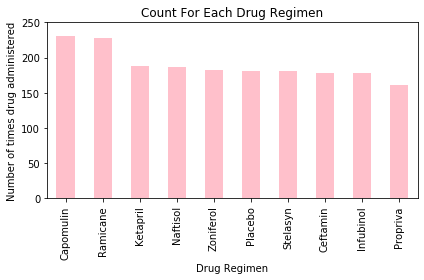

In [259]:
x_axis = np.arange(len(drug_names))
# x_axis

pandas_bar_plot = drug_count_df.plot(kind='bar',color='pink',width=0.5,legend=False)
plt.title("Count For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of times drug administered")    
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, drug_count.max()+20)
plt.tight_layout()
plt.show()

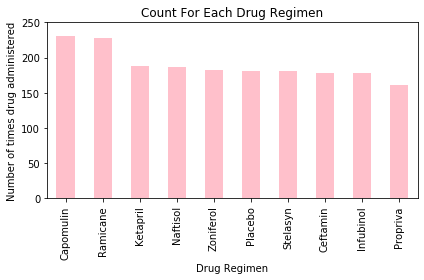

In [261]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
matplotlib_bar_plot = plt.bar(x_axis,drug_count_df['Count'],width=0.5,color='pink',align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_count_df.index,rotation=90)
plt.title("Count For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of times drug administered")
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, drug_count.max()+20)
plt.tight_layout()
plt.show()

# Pie Plots

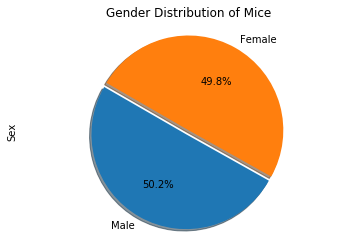

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_data = mouse_study_data[['Mouse ID','Sex']]
# mice_gender_data.head()
mice_gender_data = mice_gender_data.drop_duplicates()
# mice_gender_data.head()
mice_gender_count = mice_gender_data['Sex'].value_counts()
# mice_gender_count
mice_gender_labels = mice_gender_data['Sex'].unique()
#mice_gender_labels

mice_gender_pie_pandas = mice_gender_count.plot(kind='pie', explode=(0.05,0),autopct="%1.1f%%", shadow=True, startangle=150,title='Gender Distribution of Mice')
plt.axis('equal')
plt.show()

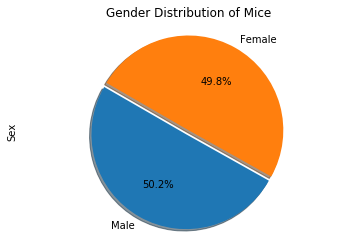

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_pie_pyplot = plt.pie(mice_gender_count,explode=(0.05,0),labels=mice_gender_labels,autopct="%1.1f%%", shadow=True, startangle=150)
plt.ylabel('Sex')
plt.title('Gender Distribution of Mice')
plt.axis('equal')
plt.show()

# Quartiles, Outliers and Boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimen- Capomulin, Ramicane, Infubinol, and Ceftamin.

most_promising_regimen = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']
MouseID_unique = mouse_study_data['Mouse ID'].unique()
# MouseID_unique

# Assumption: Final Tumor Volume would be the tumor volume in a particular mouse at last timepoint

tumor_volume_data = mouse_study_data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
# tumor_volume_data

specific_tumor_volume_data = tumor_volume_data.loc[(tumor_volume_data['Drug Regimen'] == 'Capomulin') | (tumor_volume_data['Drug Regimen'] == 'Ramicane') | (tumor_volume_data['Drug Regimen'] == 'Infubinol') | (tumor_volume_data['Drug Regimen'] == 'Ceftamin')]
#specific_tumor_volume_data

# Collecting final tumor volume data for the 4 regimen using .last() on grouped dataframe. Made sure that the 'Timeplot' column in the main csv data is sorted in ascending order before applying this function
grouped_specific_tumor_volume_data = specific_tumor_volume_data.groupby(['Mouse ID','Drug Regimen'])
grouped_specific_tumor_volume_data_df = pd.DataFrame(grouped_specific_tumor_volume_data.last())
grouped_specific_tumor_volume_data_df


,,Timepoint,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [265]:
# Dropping 'Mouse ID' as index
grouped_specific_tumor_volume_data_df.index = grouped_specific_tumor_volume_data_df.index.droplevel(0)
grouped_specific_tumor_volume_data_df

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Infubinol,45,67.973419
Infubinol,45,65.525743
Ceftamin,45,62.999356
Ramicane,45,38.407618
Ramicane,45,43.047543
...,...,...
Ceftamin,45,68.594745
Capomulin,45,31.896238
Ceftamin,45,64.729837


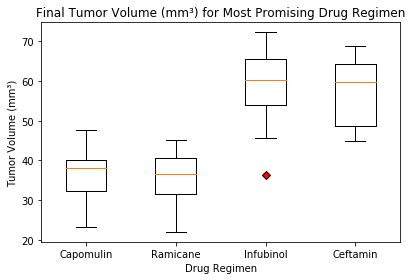

In [266]:
most_promising_regimen = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

capomulin_tdata_df = grouped_specific_tumor_volume_data_df.loc['Capomulin',['Tumor Volume (mm3)']]
capomulin_tdata = capomulin_tdata_df.iloc[:,0].values
# print(capomulin_tdata)

ramicane_tdata_df = grouped_specific_tumor_volume_data_df.loc['Ramicane',['Tumor Volume (mm3)']]
ramicane_tdata = ramicane_tdata_df.iloc[:,0].values
#print(ramicane_tdata)

infubinol_tdata_df = grouped_specific_tumor_volume_data_df.loc['Infubinol',['Tumor Volume (mm3)']]
infubinol_tdata = infubinol_tdata_df.iloc[:,0].values
#print(infubinol_tdata)

ceftamin_tdata_df = grouped_specific_tumor_volume_data_df.loc['Ceftamin',['Tumor Volume (mm3)']]
ceftamin_tdata = ceftamin_tdata_df.iloc[:,0].values
#print(ceftamin_tdata)

# To plot multiple boxplots on one graph
combined_tdata = [capomulin_tdata,ramicane_tdata,infubinol_tdata,ceftamin_tdata]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm\u00b3) for Most Promising Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm\u00b3)')
ax1.set_xlabel('Drug Regimen')
red_diamond_outliers = dict(markerfacecolor='r', marker='D')
ax1.boxplot(combined_tdata,flierprops=red_diamond_outliers)
ax1.set_xticklabels(most_promising_regimen,rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [267]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# For Capomulin
quartiles1 = capomulin_tdata_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
median1 = quartiles1[0.5]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr)
upper_bound1 = upperq1 + (1.5*iqr)

# For Ramicane
quartiles2 = ramicane_tdata_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
median2 = quartiles2[0.5]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr)
upper_bound2 = upperq2 + (1.5*iqr)

# For Infubinol
quartiles3 = infubinol_tdata_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
median3 = quartiles3[0.5]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr)
upper_bound3 = upperq3 + (1.5*iqr)

# For Ceftamin
quartiles4 = ceftamin_tdata_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
median4 = quartiles4[0.5]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr)
upper_bound4 = upperq4 + (1.5*iqr)

outliers_summary = {"Drug Regimen": most_promising_regimen,
                       "Lower Quartile": np.round([lowerq1,lowerq2,lowerq3,lowerq4],2),
                       "Upper Quartile": np.round([upperq1,upperq2,upperq3,upperq4],2),
                       "Interquartile Range": np.round([iqr1,iqr2,iqr3,iqr4],2),
                       "Median": np.round([median1,median2,median3,median4],2),
                       "Outliers may lie below value (Lower Bound)": np.round([lower_bound1,lower_bound2,lower_bound3,lower_bound4],2),
                       "Outliers may lie above value (Upper Bound)": np.round([upper_bound1,upper_bound2,upper_bound3,upper_bound4],2)}
outliers_summary_df = pd.DataFrame(outliers_summary).set_index(['Drug Regimen'])
outliers_summary_df        

,Lower Quartile,Upper Quartile,Interquartile Range,Median,Outliers may lie below value (Lower Bound),Outliers may lie above value (Upper Bound)
Drug Regimen,,,,,,
Capomulin,32.38,40.16,7.78,38.13,20.70,51.83
Ramicane,31.56,40.66,9.10,36.56,19.89,52.33
Infubinol,54.05,65.53,11.48,60.17,42.38,77.20
Ceftamin,48.72,64.30,15.58,59.85,37.05,75.97


# Line Plots

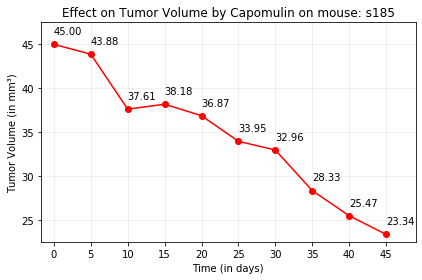

In [268]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Creating a dataframe with capomulin tumor data
capomulin_tumor_data = tumor_volume_data.loc[(tumor_volume_data['Drug Regimen'] == 'Capomulin')]
# capomulin_tumor_data

# List to store capomulin tumor data separately for every mouse
capomulin_tumor_data_permouse = []

for mouse in (capomulin_tumor_data['Mouse ID'].unique()):
    capomulin_tumor_data_permouse.append(capomulin_tumor_data.loc[(capomulin_tumor_data['Mouse ID'] == mouse)])
    
# capomulin_tumor_data_permouse

# For the purpose of this assignment, taking into account first mouse at 0th index
time = capomulin_tumor_data_permouse[0]['Timepoint']
# time
tum_vol = capomulin_tumor_data_permouse[0]['Tumor Volume (mm3)']
#tum_vol

# Plotting line graph
x_axis = np.arange(len(time))
tick_locations = [value for value in x_axis]

capomulin_line_plot = plt.plot(x_axis,tum_vol,marker='o',color='red')
plt.title(f"Effect on Tumor Volume by Capomulin on mouse: {capomulin_tumor_data_permouse[0]['Mouse ID'][10]}")
plt.xlabel("Time (in days)")
plt.ylabel("Tumor Volume (in mm\u00b3)")
plt.xticks(tick_locations,time)
          
for x,y in zip(x_axis,tum_vol):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='left',va='baseline')
          
plt.grid(alpha=0.25)
plt.xlim(-0.35, x_axis.max()+0.8)
plt.ylim(22.5, tum_vol.max()+2.5)
plt.tight_layout()
plt.show()

# Scatter Plots

In [269]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [270]:
# Collecting all Capomulin data in a separate dataframe
capomulin_data = mouse_study_data.loc[(tumor_volume_data['Drug Regimen'] == 'Capomulin')]

# Grouping Dataframe by Mouse ID for analysis
grouped_capomulin_data = capomulin_data.groupby('Mouse ID')

# Calculating average tumor volume for each mouse treated with Capomulin
avg_tumor_vol = grouped_capomulin_data['Tumor Volume (mm3)'].mean()
# avg_tumor_vol

# Collecting weight in grams for each mouse treated with Capomulin
mouse_wt = grouped_capomulin_data['Weight (g)'].mean()
# mouse_wt

# Combining values in a summary dataframe
tumvol_vs_wt_df = pd.DataFrame({"Mouse Weight (g)": mouse_wt,
                 "Average Tumor Volume": round(avg_tumor_vol,2)})
# tumvol_vs_wt_df.dtypes

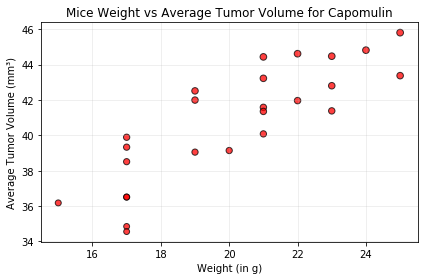

In [271]:
x_values = tumvol_vs_wt_df['Mouse Weight (g)']
y_values = y=tumvol_vs_wt_df['Average Tumor Volume']
scatterplot = plt.scatter(x=x_values,
                          y=y_values,
                          marker="o",
                          facecolors="red",
                          edgecolors="black",
                          s=tumvol_vs_wt_df['Average Tumor Volume'],
                          alpha=0.75)
plt.title(f"Mice Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (in g)")
plt.ylabel("Average Tumor Volume (mm\u00b3)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

The correlation coefficient is: 0.84
The r-squared is: 0.84


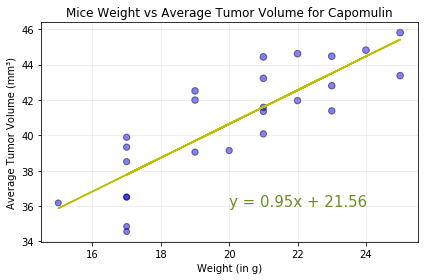

In [272]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient = round(sts.pearsonr(x_values,y_values)[0],2)
# correlation_coefficient = round(sts.pearsonr(mouse_wt,avg_tumor_vol)[0],2)
# correlation_coefficient

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scatterplot = plt.scatter(x=x_values,
                          y=y_values,
                          marker="o",
                          facecolors="blue",
                          edgecolors="black",
                          s=tumvol_vs_wt_df['Average Tumor Volume'],
                          alpha=0.5)
plt.title(f"Mice Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (in g)")
plt.ylabel("Average Tumor Volume (mm\u00b3)")
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(20,36),fontsize=15,color="olivedrab")
print(f"The correlation coefficient is: {correlation_coefficient}")
print(f"The r-squared is: {round(rvalue,2)}")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()